In [23]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



In [24]:
%autoreload 2
from src import ODE_euler


## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



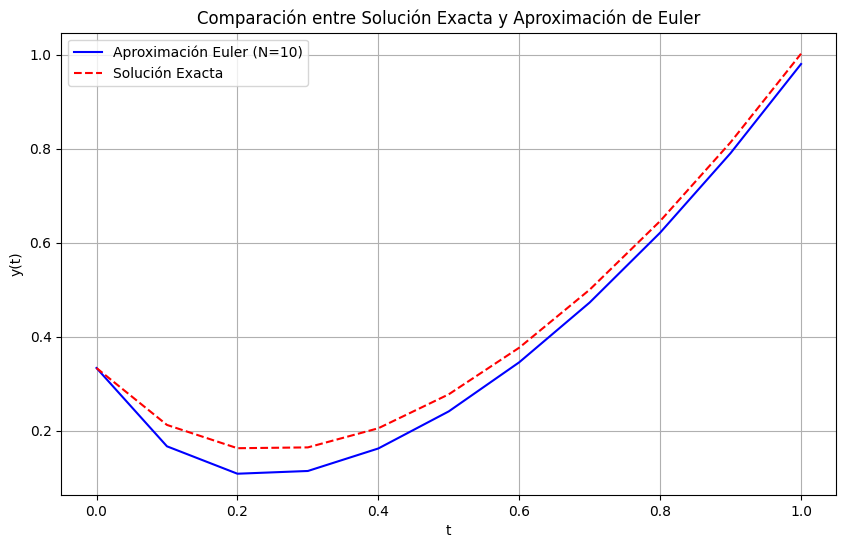

Valor de h: 0.1
Error relativo promedio para N=10: 1.29e-01
Error relativo promedio para N=5: 2.80e-01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la ecuación diferencial
def f(t, y):
    return -5*y + 5*t**2 + 2*t

# Solución exacta
def exact_solution(t):
    return t**2 + (1/3)*np.exp(-5*t)

# Parámetros del problema
a = 0
b = 1
y_t0 = 1/3
N = 10

# Aplicar método de Euler
ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

# Calcular solución exacta
exact_ys = [exact_solution(t) for t in ts]

# Calcular errores relativos
relative_errors = [abs((exact - approx)/exact) for exact, approx in zip(exact_ys, ys)]
average_error_N10 = np.mean(relative_errors)

# Repetir para N=5
N5 = 5
ys_N5, ts_N5, h_N5 = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N5)
exact_ys_N5 = [exact_solution(t) for t in ts_N5]
relative_errors_N5 = [abs((exact - approx)/exact) for exact, approx in zip(exact_ys_N5, ys_N5)]
average_error_N5 = np.mean(relative_errors_N5)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(ts, ys, 'b-', label='Aproximación Euler (N=10)')
plt.plot(ts, exact_ys, 'r--', label='Solución Exacta')
plt.title('Comparación entre Solución Exacta y Aproximación de Euler')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()

# Resultados
print(f"Valor de h: {h}")
print(f"Error relativo promedio para N=5: {average_error_N5:.2e}")
print(f"Error relativo promedio para N=10: {average_error_N10:.2e}")

# Errores
Calcule el eeror relativo para diferentes valores de N.

In [25]:
# Calcular error relativo

In [1]:
import logging
from sys import stdout
from datetime import datetime
import os

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(f"{os.getlogin()}| {datetime.now()}")

# ----------------------------- #### --------------------------
from typing import Callable


# ####################################################################
def ODE_euler(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    """Solves (numerically) an ODE of the form
        dy/dt = f(t, y)
            y(t_0) = y_t0, a <= t_0 <= b
    using the Euler method for the N+1 points in the time range [a, b].

    It generates N+1 mesh points with:
        t_i = a + i*h, h = (a - b) / N,
    where h is the step size.


    ## Parameters
    ``a``: initial time
    ``b``: final time
    ``f``: function of two variables ``t`` and ``y``
    ``y_t0``: initial condition
    ``N``: number of mesh points

    ## Return
    ``ys``: a list of the N+1 approximated values of y
    ``ts``: a list of the N+1 mesh points
    ``h``: the step size h

    """
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h


# ####################################################################
from math import factorial


def ODE_euler_nth(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    f_derivatives: list[Callable[[float, float], float]],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    """Solves (numerically) an ODE of the form
        dy/dt = f(t, y)
            y(t_0) = y_t0, a <= t_0 <= b
    using the Taylor method with (m - 1)th derivatives for the N+1 points in the time range [a, b].

    It generates N+1 mesh points with:
        t_i = a + i*h, h = (a - b) / N,
    where h is the step size.


    ## Parameters
    ``a``: initial time
    ``b``: final time
    ``f``: function of two variables ``t`` and ``y``
    ``f_derivatives``: list of (m - 1)th derivatives of f
    ``y_t0``: initial condition
    ``N``: number of mesh points

    ## Return
    ``ys``: a list of the N+1 approximated values of y
    ``ts``: a list of the N+1 mesh points
    ``h``: the step size h

    """
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        T = f(t, y)
        ders = [
            h / factorial(m + 2) * mth_derivative(t, y)
            for m, mth_derivative in enumerate(f_derivatives)
        ]
        T += sum(ders)
        y += h * T
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h

[08-07 13:49:45][INFO] CORE I5| 2025-08-07 13:49:45.901301
